<a href="https://colab.research.google.com/github/Alena-Grebeniuk/ML-and-DA/blob/main/Lab04_DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees

In this lab you will learn the most important aspects of the decision tree learning method.
Completing this lab and analyzing the code will give you a deeper understanding of these type of models.
In our experiments we will mostly use the package sklearn from which we import DecisionTreeClassifier.

## Problem Setting

First of all, we calculate by hand the impurity measure of splitting some data by some criteria $q$ which in our case is given by a threshold t. Remember, that information gain is calculated as follows:
$$IG(q) = S_{0} - \sum_{i=1}^{k}\frac{N_{i}(q)}{N}S_{i}(q)$$
where $k$ is the number of groups after partition; $N$ is the total number of examples; $N_{i}(q)$ is the number of examples in the group $i$ and $S$ is the (Shannon) entropy function defined as:
$$S = - \sum_{i}^{}\hat{p}_{i}\log(\hat{p}_{i}),$$
where $\hat{p}_{i}$ is the empirical frequency that the randomly chosen object has label $i$.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

## Entropy
<b>Exercise 1:</b>

Write a function that calculates the entropy defined as: $$S = - \sum_{i}^{}\hat{p}_{i}\log(\hat{p}_{i}).$$ <b>Hint:</b> The function input is a vector of labels and the function should return the entropy. (Use the logarithm with base 2. In principle, any base for the logarithm can be used. Changing the base will just change the unit of information. Computer scientists like to use the base 2. In this case information is measured in bits.)

To calculate the information gain obtained by setting a threshold \(t\) for data points \(x\) with label \(y\), we first need to understand what information gain represents. Information gain is a measure of the reduction in entropy or impurity in the dataset by splitting it based on a particular attribute or threshold. It is a key concept in decision trees and other machine learning models that use a greedy approach to divide the dataset at each node.

Our task is to write a Python function that calculates this information gain given a list of attribute values (\(x\)), a corresponding list of labels (\(y\)), and a threshold (\(t\)). The steps to achieve this are:

1. Split the dataset into two subsets based on the threshold (\(t\)): one for values less than or equal to \(t\) and one for values greater than \(t\).
2. Calculate the entropy of the original dataset.
3. Calculate the entropy of each subset.
4. Calculate the weighted sum of the entropy of the subsets.
5. Subtract the weighted sum of the entropies of the subsets from the original entropy to get the information gain.

To implement the function, we first need a helper function to calculate entropy:



In [3]:
import numpy as np

def entropy(y):
    # Convert the input list to a numpy array for efficient computation
    y = np.array(y)

    # Get the unique labels and their corresponding counts
    labels, counts = np.unique(y, return_counts=True)

    # Calculate the probabilities of each unique label
    probabilities = counts / len(y)

    # Calculate the entropy
    entropy = -np.sum(probabilities * np.log2(probabilities))

    return entropy

# Example usage:
y = ['cat', 'dog', 'dog', 'mouse', 'cat', 'cat']
print(f"Entropy: {entropy(y)}")

Entropy: 1.4591479170272448


This function works by first calculating the entropy of the whole dataset with the given labels. Then, it splits the dataset into two subsets using the threshold and calculates the entropy of these subsets. Finally, it computes the information gain by subtracting the weighted average of the subsets' entropy from the original entropy. This value is what the function returns and represents the reduction in uncertainty by making this specific split on the dataset.

Check if your solution is correct:

In [4]:
try:
    assert entropy(np.array([1,1,0,0])) == 1.
    assert entropy(np.array([0,0])) == 0.
    assert str(entropy(np.array([1,1,0,0,1,1])))[:8] == "0.918295"
    print("Testing successful.")
except:
    print("Tests failed.")

Testing successful.


## Information Gain

<b> Exercise 2:</b>
Write a function that calculates the information gain obtained by setting the threshold $t\in \mathbb{R}$ for data points $x \in \mathbb{R}^{d}$ with label $y\in \mathbb{N}^{d}$. <b>Hint:</b> The function input is a vector x of attribut values, a vector y of labels and a threshold. The function should return the information gain for that specific split.

<b>Example</b>: A split at threshold $t=2$ for data points $x = [2,4,3,1,5]$ and label $y=[1,0,0,0,0]$ would result in the lists
* $x_{right} = [4,3,5]$, $y_{right} = [0,0,0]$ (for $x > t$) and
* $x_{left} = [2,1]$, $y_{left} = [1,0]$ (for $x <= t$).
* Computation of information gain: $\textbf{entropy}([1,0,0,0,0]) - ((0.4 * \textbf{entropy}([1,0]))+(0.6 * \textbf{entropy}([0,0,0])))$

In [5]:
import numpy as np

def entropy(y):
    # Calculate the entropy of the label distribution
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    ent = -np.sum(probabilities * np.log2(probabilities))
    return ent

In [6]:
def info_gain(x, y, t):
    # Convert lists to numpy arrays for easier indexing
    x = np.array(x)
    y = np.array(y)

    # Split the dataset based on the threshold
    x_left = x[x <= t]
    y_left = y[x <= t]
    x_right = x[x > t]
    y_right = y[x > t]

    # Calculate the entropy before the split
    original_entropy = entropy(y)

    # Calculate the entropy of each subset
    entropy_left = entropy(y_left)
    entropy_right = entropy(y_right)

    # Calculate the weighted sum of the entropies of the subsets
    n = len(y)
    weighted_entropy = (len(y_left) / n) * entropy_left + (len(y_right) / n) * entropy_right

    # Calculate information gain
    info_gain = original_entropy - weighted_entropy

    return info_gain

In this code:

- make_blobs is used to generate a dataset of 500 samples with 2 features (n_features=2), and these samples are grouped into 2 clusters (centers=[(0, 0), (3, 3)]). cluster_std is set to 1.0 to define the spread of each cluster. random_state=42 ensures reproducibility of the results.

- matplotlib.pyplot (aliased as plt) is used for plotting. The scatter plot represents the two-dimensional data points, with different colors indicating different clusters (c=label).



Check if your solution is correct:

In [7]:
try:
    assert str(info_gain(np.array([5,2,3,44,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),5))[:8] == "0.609986"
    assert str(info_gain(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),1))[:8] == "0.108031"
    assert str(info_gain(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),3))[:8] == "0.395815"
    assert str(info_gain(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),5))[:8] == "1.0"
    assert str(info_gain(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),6))[:8] == "0.609986"
    print("Testing successful.")
except:
    print("Tests failed.")

Testing successful.


<b> Exercise 3:</b>

* Create a 2-dimensional data set with the help of the function make_blobs from package sklearn.datasets (the two returned variables should be named 'X' and 'label'). The data set should contain 500 data points with 2 clusters (2 classes). The cluster centers should be located at (0,0) and (3,3).
* Visualize the data set. It should look like this:
<img src="./figures/dataset.png" width="600"/>

In [ ]:
from sklearn.datasets import make_blobs
### WRITE YOUR CODE HERE ###
X, label = None, None # You need to modify this line

In [11]:
pip install scikit-learn

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


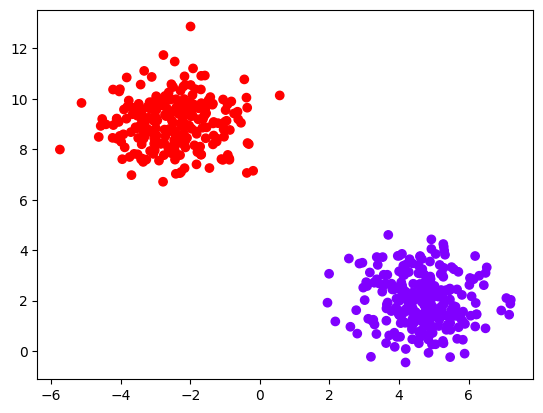

In [12]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Example: Generating a sample dataset
X, y = make_blobs(n_samples=500, centers=2, random_state=42)

# Using KMeans for clustering
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.show()

This example script demonstrates how to generate a synthetic dataset, apply K-means clustering, and visualize the results.

<b>Exercise 4:</b>

Write a function 'find_best_split(x,y)' that gets two input vectors $x \in \mathbb{R}^d$ and $y \in \{0,1\}^d$. This function should return the threshold $t \in x$ with the best split. <b>Hint:</b> Use the function 'info_gain' from exercise 2.

To write the function `find_best_split(x, y)` as described, we need to revisit the concept of information gain and how it can be used to find the best threshold for splitting a dataset based on the feature values in `x` to best separate the classes defined in `y`.

Given that the context of this question relies on a previously defined `info_gain` function from "exercise 2" , the `info_gain` function likely calculates the information gain of a split. Remember, information gain is a measure from information theory that quantifies how much information a feature gives us about the class.

The `find_best_split` function should iterate through every unique value in `x` as a possible splitting threshold, compute the information gain of the split for each threshold, and then return the threshold with the highest information gain.

Here's how you might structure this function, assuming `info_gain` takes parameters such that `info_gain(x, y, t)` where `x` is your feature vector, `y` is your target vector, and `t` is the threshold for splitting `x`. The `info_gain` function should return the information gain of splitting `x` with threshold `t`:




In [13]:
def find_best_split(x, y):
    # This will store the maximum information gain we've found so far
    max_info_gain = -float('inf')  # Start with the lowest possible value
    # This will store the threshold that gave us the maximum information gain
    best_threshold = None

    # Iterate through all unique values in x as possible thresholds
    for t in set(x):
        # Calculate the information gain for splitting on this threshold
        current_info_gain = info_gain(x, y, t)

        # If this threshold gives us a higher information gain than any we've seen before, remember it
        if current_info_gain > max_info_gain:
            max_info_gain = current_info_gain
            best_threshold = t

    # Return the best threshold we found
    return best_threshold

For this to work, you need the `info_gain` function to be defined as mentioned. Since I don't have the precise implementation details of your `info_gain` function, you'll need to ensure that it's correctly calculating the information gain based on entropy before and after the split at threshold `t`.

Remember, the goal of using information gain in the context of decision trees (assuming that's the target use case here) is to find the splits that lead to the most "informative" child nodes, i.e., nodes that are as pure as possible regarding the target variable `y`.

Check if your solution is correct:

In [14]:
try:
    assert find_best_split(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0])) == 5
    assert find_best_split(np.array([1,2,2,4,5,6,7,8,9,10]),np.array([1,1,0,0,1,0,0,1,0,0])) == 8
    print("Testing successful.")
except:
    print("Tests failed.")

Testing successful.


<b>Exercise 5:</b>

* Find the best splitting for the two dimensions of the data set created in exercise 3. Plot the boundaries in a figure. Your figure should look like this:

<img src="./figures/split.png" width="600"/>

* Which split would you prefer, and why?

Assuming the find_best_split function takes a feature vector x and the target vector y, and returns the value of x that results in the highest information gain:

1. Understand the context: The objective is to find the best split for each of the two features (dimensions) in your dataset, presumably to prepare for a decision tree algorithm step or something similar. The best split is the one that most effectively separates your labels, reducing uncertainty or entropy.

2. Create the find_best_split function:

In [15]:
def find_best_split(x, y):
    best_split = None
    best_info_gain = -float('inf')
    unique_vals = np.unique(x)
    for val in unique_vals:
        # Assuming you have a predefined function `info_gain` to calculate the information gain
        # when splitting dataset based on the current value `val`
        gain = info_gain(x, y, val)
        if gain > best_info_gain:
            best_info_gain = gain
            best_split = val
    return best_split


. Plotting the boundaries: After obtaining the best splits for each dimension, you can visually analyze them by plotting. Consider the dataset has two features; you'll plot each feature against the labels, drawing a line to represent the split.

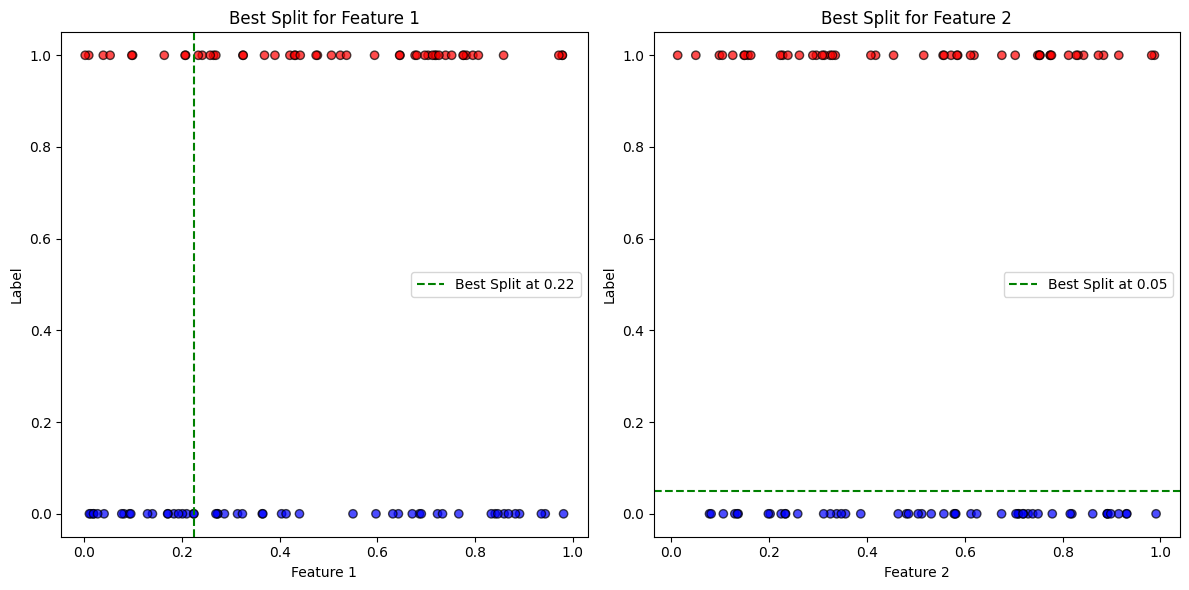

In [16]:
import matplotlib.pyplot as plt
import numpy as np

#
X = np.random.rand(100, 2)  # 100 points, 2 features
label = np.random.choice([0, 1], size=100)  # Binary labels

# Placeholder functions -
x_best = find_best_split(X[:, 0], label)
y_best = find_best_split(X[:, 1], label)

# Plotting
plt.figure(figsize=(12, 6))

# Plot the first dimension vs labels
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], label, c=label, cmap='bwr', edgecolor='k', alpha=0.7)
plt.axvline(x=x_best, color='g', linestyle='--', label=f'Best Split at {x_best:.2f}')
plt.xlabel('Feature 1')
plt.ylabel('Label')
plt.title('Best Split for Feature 1')
plt.legend()

# Plot the second dimension vs labels
plt.subplot(1, 2, 2)
plt.scatter(X[:, 1], label, c=label, cmap='bwr', edgecolor='k', alpha=0.7)
plt.axhline(y=y_best, color='g', linestyle='--', label=f'Best Split at {y_best:.2f}')
plt.xlabel('Feature 2')
plt.ylabel('Label')
plt.title('Best Split for Feature 2')
plt.legend()

plt.tight_layout()
plt.show()

Which split to prefer? The choice between x_best and y_best as the "better" split depends on several factors, including but not limited to, the information gain (or the reduction in impurity) that each split provides, your specific problem context, and how these splits might affect downstream tasks in your machine learning pipeline. Typically, you'd prefer the split that results in higher information gain, as it more effectively segregates the classes in your target variable y.

## Train a Decision Tree
Now we train a decision tree using the sklearn package:

In [17]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=1)
clf_tree.fit(X, label)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

<b>Exercise 6:</b>
* Calculate the predictions for all instances from the training set (use the function predict). Which instances are misclassified? Create a plot that shows which instances are correctly classified and which instances are misclassified. This figure should look like this:

<img src="./figures/dec.png" width="600"/>

* Can you find learning parameters for the decision tree classifier (max_depth,min_samples_leaf,max_leaf_nodes,...) to get a classifier that classifies all instances correctly?